In [1]:
import sys
sys.path.append("../pre-processing")
sys.path.append("../pre-processing/methods")
sys.path.append("../learning_model")
from parse import parse
from freqDomain import *
from timeDomain import *
import numpy as np
import matplotlib.pyplot as plt
import pickle
from analytical import *

In [34]:
test = pickle.load(open("C:/Users/levinwv1/Downloads/3-Seconds-Will-Trial-2.MultFeat"))
test_x = test[0]
test_y = test[1]

In [35]:
background_value = 0
def prepare(data):
    #this is the data we'll be returning
    two_dimension_data = np.zeros((len(data), len(data[0]), 3))
    for j in range(len(data)):
        for i in range(len(data[j])):

            #the first feature is simply the max of the FFT
            two_dimension_data[j][i][0] = np.max(data[j][i])
        for k in range(10, len(data[j])):
            #the second feature is the tangent slope
            two_dimension_data[j][k][1] = ((two_dimension_data[j][k][0] - two_dimension_data[j][k - 10][0])/(10))

            #the third feature is the timepoint in comparison to its local mean
            local = two_dimension_data[j][k - 25: k, 0]
            two_dimension_data[j][k][2] = (two_dimension_data[j][k][0] - np.mean(local))

    #get rid of nan values
    two_dimension_data = get_rid_nan_values(two_dimension_data)

    #smooth
    two_dimension_data = savgol(two_dimension_data)

    #normalize about x axis
    #two_dimension_data = normalize(two_dimension_data, background_value = background_value)


    return two_dimension_data

In [36]:
test_x = prepare([test_x])[0]

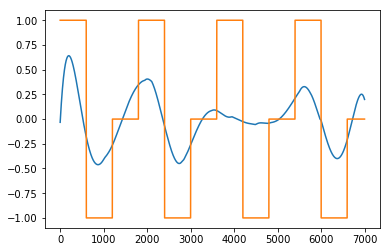

In [37]:
plt.plot(test_x[:, 1])
plt.plot(test_y)
plt.show()

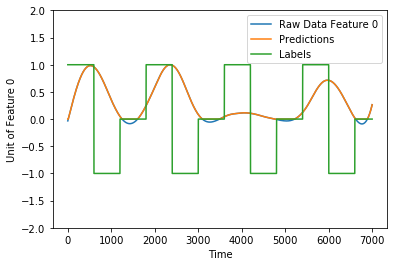

Performance on test data: 
Accuracy:0.842714285714


In [38]:
an = analytical()
an.evaluate(test_x, test_y)

In [217]:
predictions = []
for i in range(len(normal)):
    if normal[i, 0] > 0 and np.abs(normal[i, 2]) > 3:
        if normal[i, 2] > 0:
            predictions.append(normal[i, 0])
        else:
            predictions.append(-1* normal[i, 0])
    else:
        predictions.append(0)

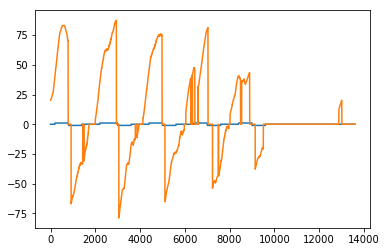

In [218]:
plt.plot(test_y[20000:])
plt.plot(predictions[20000:])

plt.show()

In [39]:
concat = [test_x, test_y]

In [41]:
len(concat[1])

7000

In [42]:
pickle.dump(concat, open("C:/Users/levinwv1/Downloads/3-Seconds-Will-Trial-2.MultFeat", "wb"))